<div class="alert alert-block alert-info">
<span style="font-size:xx-large;"><center>Interpolation</center></span>
</div>

We are looking for the interpolation of the equation:
$$ f(x) = e^{(x^2)} - ax^2 $$

Here we will look for the coefficients of the values:

$x_{-1} = -1$ => $f_{-1} =$ 

$x_{0} = 0$ => $f_{0} =$

$x_{1} = 1$ => $f_{1} =$

In order to find $x$ we need an equation of the form $f(x) = 0$, to have an overview of the equation, let's plot it as we learn priorly. (Define the equation in a function)

<IPython.core.display.Javascript object>


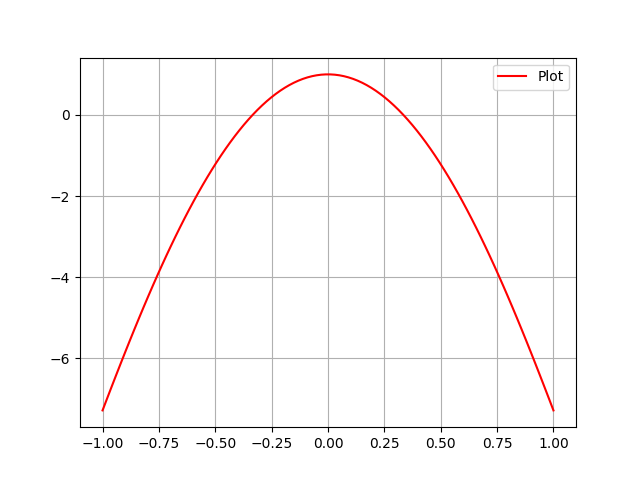

In [17]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import math

xmin, xmax = -1.0, 1.0
Npts = 100
x = np.linspace(xmin,xmax,Npts)
alpha = 10.
def function(x,a):
    y = np.exp(x**2.) - a*x**2.
    return y
y = function(x,alpha)
plt.plot(x,y,'-r',label='Plot')
plt.grid(True)
plt.legend(loc='best')
plt.show()

We can interpolate this function by the definition of a polynomial form defined by a degree 2. To determne the coefficient of :
$ax^{2} + bx + c$
you can set x at three different values (-1, 0, 1) and find $a,b,c$ by the use of an inverted matrix.

Then write your polynom in python and draw a plot of both curves

In [2]:
a = -8.2817
b = 0.
c = 1.
def Polynom(x,a,b,c):
    y = a*x**2. + b*x + c
    return y
y_pol = Polynom(x,a,b,c)

plt.plot(x,y,'-r',label='Plot')
plt.plot(x,y_pol,'--b',label='Pol')
plt.grid(True)
plt.legend(loc='best')
plt.show()

Now that you lost your mind on this inversion of matrix, you can also use python to solve it step by step, giving him the [3,3] matrix that you got from the prior part.

In [3]:
Y = np.array(([function(-1.,10.)],[function(0.,10.)],[function(1.,10.)]))
Matrice = np.array(([1,-1,1],[0,0,1],[1,1,1]))


You can inverte your matrix using np.linalg.inv(Matrice)

In [4]:
Mat_inv = np.linalg.inv(Matrice)

And then obtain the result of your system using np.dot

In [5]:
Results = np.dot(Mat_inv,Y) 

The result of np.dot will contain the coefficient of your polynom that you can send to your prior Polynom declared function and then plot it.

In [6]:
a_Mat, b_Mat, c_Mat = Results[0],Results[1],Results[2]
y_pol_Mat = Polynom(x,a_Mat, b_Mat, c_Mat)

plt.plot(x,y,'-r',label='Plot')
plt.plot(x,y_pol,'+k',label='Pol')
plt.plot(x,y_pol_Mat,'--b',label='Pol with matrix')
plt.grid(True)
plt.legend(loc='best')
plt.show()

As we saw in the prior TP, Python go even further with already written interpolation algorithms. Here we will use the lagrange interpolation from scipy. I advice you to call this module with the following line.

In [7]:
from scipy import interpolate

Then, from this package if you want to use the lagrange interpolation you just have to write:

example = interpolate.lagrange()

Check the http://docs.scipy.org/doc/scipy/reference/interpolate.html website to learn how to use the lagrange interpolation.


But first, we will declare the following equation $f(x) = sin(2.x.\pi)$, and plot it on [0,2]. You can directly copy the prior program of this practice and change the equation that we used.

In [8]:
xmin, xmax = 0.0, 2.0
Npts = 100
x = np.linspace(xmin,xmax,Npts)

def function2(x):
    y = np.sin(2.*x*np.pi)
    return y

y_sin = function2(x)
plt.plot(x,y_sin,"-r",label="Courbe Init")
plt.grid(True)
plt.legend(loc="best")
plt.show()
plt.close()

On the same interval, with 10 points, declare a variable "x_lag".

In [9]:
Npts_lag = 10
x_lag = np.linspace(xmin,xmax,Npts_lag)

You can finally use the lagrange interpolation and plot the results of those 10 points that you will obtain.

<IPython.core.display.Javascript object>


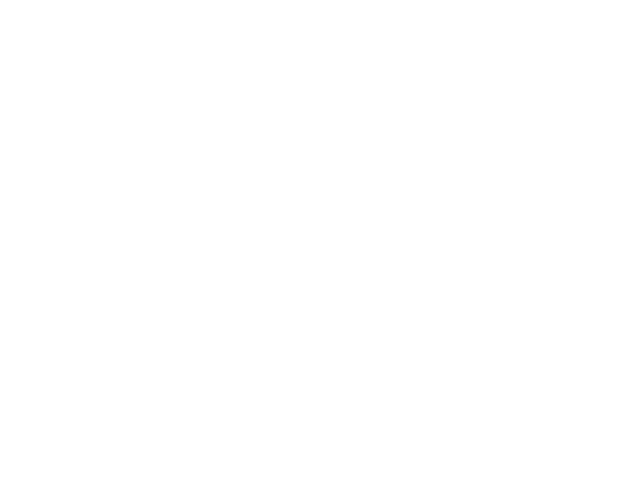

In [10]:
y_lag = function2(x_lag)
p = interpolate.lagrange(x_lag,y_lag)
plt.plot(x,y,"-r",label="Courbe Init")
plt.plot(x_lag,y_lag,"+b",label="Interpolation Lagrangienne")
plt.grid(True)
plt.legend(loc="best")
plt.show()
plt.close()

Now that we interpolate some points of this function, we can determine the coefficients of this polynom of order 9, according to the number of points that we declared in "x_lag" with a simple declaration of the coeficients:

In [11]:
coef = p.c
print(coef)

[   19.9998631   -179.99876788   656.22762725 -1233.61639043
  1259.47249677  -681.15258025   193.06934056   -43.58139474
     9.57980562     0.        ]


You can verify that we have the good amount of coeficients with a print statement.

Then, to define you polynom, you will write a function giving you for each x, the y result of the polynom. 

We saw that coef contains all of the coefficient of the polynom form, and the function pow can be used in a loop to select the power up of the variable.

In [12]:
def Pol(x):
    n = len(coef)
    Pol = coef[n-1]
    for i in range(0,n-1):
        Pol = Pol + coef[i]*pow(x,n-1-i)
        i += 1
        print("i=",i)
    return Pol

Plot all the results on the same graph. If you get the same curve and all your cells are exectued, consider that this second part of the practice is done.

i= 1
i= 2
i= 3
i= 4
i= 5
i= 6
i= 7
i= 8
i= 9


<IPython.core.display.Javascript object>


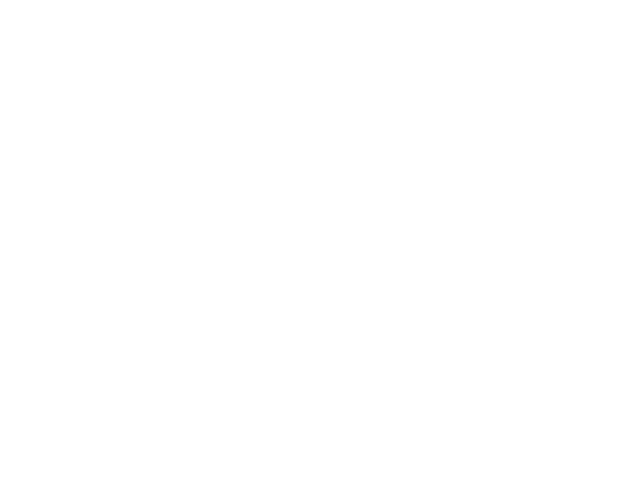

In [13]:
y_pol = Pol(x)
plt.plot(x,y_pol,"-k",label="Courbe Pol")
plt.plot(x,y,"-r",label="Courbe Init")
plt.plot(x_lag,y_lag,"+b",label="Interpolation Lagrangienne")
plt.grid(True)
plt.legend(loc="best")
plt.show()
plt.close()

In the third part of this practice, we will work on the runge function which is define by \\( f(x) = \frac{1}{1 + 25 x^{2}} \\)

So first, define this function and plot it.

<IPython.core.display.Javascript object>


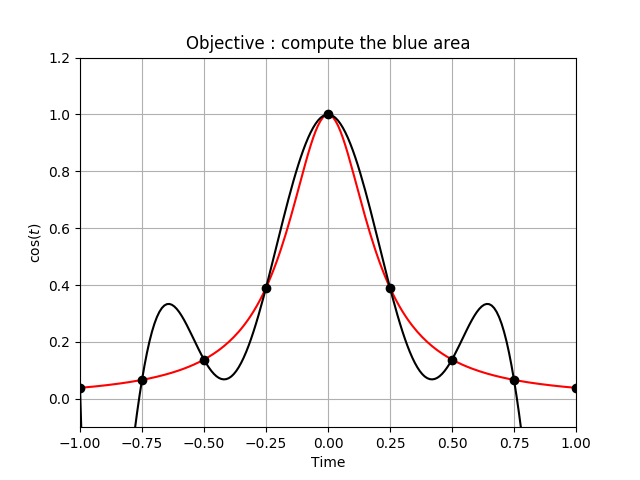

In [2]:
def runge_function(x):
    y = 1/(1+25.*x**2.)
    return y

xmin = -1.0
xmax = 1.0

fig, ax = plt.subplots()

t = np.arange(xmin, xmax, 0.01)


ax.plot(t, runge_function(t),'r-')


Then we will try to interpolate this function with the help of a polynom, so first, declare a function which will give us the result of the linear system with the help of a matrix.

In [3]:
def coefs(x,y):
    mat = np.zeros((len(x),len(x)))
    for p in range(len(x)):
        mat[p, :] = [x[p] ** i for i in range(len(x))]

    return np.linalg.solve(mat, y)

Then, with the result of the prior define function, we can define the polynom on an other function.

In [4]:
def poly(x, coefs):
    return sum(coef*x**i for i, coef in enumerate(coefs))


With the use of those functions, you can interpolate the runge equation to obtain a polynomial form.

The number of points that you will set in your polynomial form will directly determine its degree. Try a high and low number and compare them.

In [ ]:
npoints=9
x = np.linspace(-1.,1.,npoints)

y = runge_function(x)
coef_poly = coefs(x,y)

ax.plot(t, poly(t, coef_poly),'k-')
ax.plot(x, poly(x, coef_poly),'ko')

ax.set_xlim(xmin,xmax)
ax.set_ylim(-0.1,1.2)
plt.xlabel("x")
plt.ylabel("y")
plt.title('The Runge Interpolation')
#ax.fill_between(t, 0, runge_function(t))
ax.grid()
plt.show()

You can see on the graph the highs fluctuations of values on both extremities of the domain. This is called Runge's phenomenon in the mathematical field of numerical analysis.
Runge's phenomenon is a problem of oscillation at the edges of an interval that occurs when using polynomial interpolation with polynomials of high degree over a set of equispaced interpolation points. It was discovered by Carl David Tolmé Runge (1901).The discovery was important because it shows that going to higher degrees does not always improve accuracy.

A similar behavior is the arctan function, $f(x) = arctan(ax)$, plot it and compare it to the prior function. 

<IPython.core.display.Javascript object>


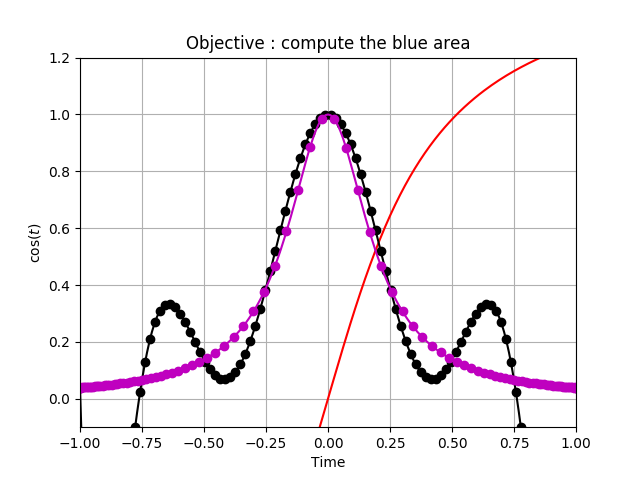

In [18]:
def arctan(x):
    y = np.arctan(3*x)
    return y

fig, ax = plt.subplots()

t = np.arange(xmin, xmax, 0.01)

ax.plot(t, arctan(t),'r-')

You can now interpolate the runge function with the arctan function to determine a polynomial form which wont oscillate on the extremities of the domain.

In [19]:
x2 = np.arctan(3*x)
x2 /= np.max(x2)
y2 = runge_function(x2)
coef_poly2 = coefs(x2,y2)

ax.plot(t, poly(t, coef_poly),'k-')
ax.plot(x, poly(x, coef_poly),'ko')

ax.plot(t, poly(t, coef_poly2),'m-')
ax.plot(x2, poly(x2, coef_poly2),'mo')

ax.set_xlim(xmin,xmax)
ax.set_ylim(-0.1,1.2)
plt.xlabel("x")
plt.ylabel("y")
plt.title('The Runge Interpolation')
ax.grid()
plt.show()

You can also fill the area under the curve to integrate it. #A voir avec Alex

In [16]:
ax.fill_between(t, 0, runge_function(t))
ax.grid()
plt.show()

<div class="alert alert-block alert-danger">
<span style="font-size:xx-large;">
    <center>
        **Do not forget**
    </center>
</span>
</div>

Once all cells have been **filled** and **executed**, save this document as a pdf file (by printing it)  
Check that everything is present on the produced pdf  
Send **the pdf AND the notebook** to me via Universitice  
This will be used to evaluate you.

<div class="alert alert-block alert-info">
<span style="font-size:xx-large;"><center>That's it for today !</center></span>
</div>